# Importing Modules

In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd

# plotting libraries
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

# plotly
import plotly.express as px

# bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


In [2]:
output_notebook()

Loading BokehJS ...

# Data Cleansing

In this part of the analysis I will look for duplicate rows, empty rows and anything that I may need to remove from the dataframe before we beginning working with the dataset.

In [3]:
# loading data into a dataframe
death_df = pd.read_csv('number-of-deaths-by-risk-factor.csv')

death_df.head(3) # first three rows

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   

   Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)  \
0                                               3169                                                      
1                                               3222                                                      
2                                               3395                                                      

   Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)  \
0                                              25633                                                      
1                                              25872                                                      
2                                              26309                                                      

   Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)  \
0                                               1045                                             
1                                               1055                                             
2                                               1075                                             

   Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)  \
0                                               7077                                                  
1                                               7149                                                  
2                                               7297                                                  

   Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)  \
0                                                356                                     
1                                                364                                     
2                                                376                                     

   Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)  \
0                                               3185                                            
1                                               3248                                            
2                                               3351                                            

   Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)  \
0                                               3702                                             
1                                               4309                                             
2                                               5356                                             

   ...  \
0  ...   
1  ...   
2  ...   

   Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)  \
0                                               9518                                              
1                                               9489                                              
2                                               9528                                              

   Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
0                                               2798                                           
1                                               3254                                           
2                                               4042                                           

   Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)  \
0                                               4825                                                           
1                                    

In [4]:
death_df.tail(2) # last 2 rows

Entity Code  Year  \
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)  \
6838                                               2669                                                      
6839                                               2680                                                      

      Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)  \
6838                                              12002                                                      
6839                                              12241                                                      

      Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)  \
6838                                               1117                                             
6839                                               1140                                             

      Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)  \
6838                                               1439                                                  
6839                                               1475                                                  

      Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)  \
6838                                               5044                                     
6839                                               5156                                     

      Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)  \
6838                                               1917                                            
6839                                               1960                                            

      Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)  \
6838                                               4013                                             
6839                                               3914                                             

      ...  \
6838  ...   
6839  ...   

      Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)  \
6838                                               6248                                              
6839                                               6475                                              

      Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
6838                                               2608                                           
6839                                               2531                                           

      Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)  \
6838                                               4153                                                           
6839                                               4113                                                           

      Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)  \
6838                                                969                                  
6839                                                963                                  

      Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)  \
6838                                                434                                                  
6839                                                438                                                  

      Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)  \
6838                                                 85            

In [5]:
# dimensions of the dataframe
death_df.shape

(6840, 31)

In [6]:
# removing duplicate rows
death_df.drop_duplicates(keep='first')

death_df.shape

(6840, 31)

The dataset has 6840 rows with 31 columns, there are no empty rows at the end that need to be removed. There are also no duplicate rows that could be found. There are no empty columns but the headings or headers of the colums are very messy and contain a lot of unnecessary information that we can do without. For example 'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)', can be reduced to just 'Outdoor air pollution - OWID' since we know that the dataset is about the number of deaths by risk factor. Below is the dataframe with the cleaned column headers.

In [7]:
# columns list
columns = ['Entity','Code','Year']

# iterating through list of dataframe colums
for col in death_df.columns[3:]:
    
    # removing unneccessary column name info
    columns.append(col[col.index('k: ')+3: col.index(' - S')])

death_df.columns = columns # updating column names

pd.set_option('display.max_columns', None)
death_df.head(1) # first row

Entity Code  Year  Outdoor air pollution - OWID  \
0  Afghanistan  AFG  1990                          3169   

   High systolic blood pressure  Diet high in sodium  \
0                         25633                 1045   

   Diet low in whole grains  Alcohol use  Diet low in fruits  \
0                      7077          356                3185   

   Unsafe water source  Secondhand smoke  Low birth weight  Child wasting  \
0                 3702              4794             16135          19546   

   Unsafe sex  Diet low in nuts and seeds  \
0         351                        2319   

   Household air pollution from solid fuels  Diet low in vegetables  \
0                                     34372                    3679   

   Low physical activity  Smoking  High fasting plasma glucose  Air pollution  \
0                   2637     5174                        11449          37231   

   High body-mass index  Unsafe sanitation  No access to handwashing facility  \
0                  9518               2798                               4825   

   Drug use  Low bone mineral density  Vitamin A deficiency  Child stunting  \
0       174                       389                  2016            7686   

   Discontinued breastfeeding  Non-exclusive breastfeeding  Iron deficiency  
0                         107                         2216              564

From below we can see that the datatypes for the columns are correct and only one column seems to have missing or null values that will be dealt with later. And ofcourse we can see that the names of the columns have been cleaned.

In [8]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Entity                                    6840 non-null   object
 1   Code                                      6150 non-null   object
 2   Year                                      6840 non-null   int64 
 3   Outdoor air pollution - OWID              6840 non-null   int64 
 4   High systolic blood pressure              6840 non-null   int64 
 5   Diet high in sodium                       6840 non-null   int64 
 6   Diet low in whole grains                  6840 non-null   int64 
 7   Alcohol use                               6840 non-null   int64 
 8   Diet low in fruits                        6840 non-null   int64 
 9   Unsafe water source                       6840 non-null   int64 
 10  Secondhand smoke                          6840 n

Now that the data cleansing is done, the dataframe has no duplicate rows, but it does have missing datapoints in one column. The next step is to analyse this missing data and how to handle it.


# Handling Missing Data

First thing to do is to locate the missing data in the dataframe, a visualisation of the dataframe will make it is easier to get a quick sense of the spread of the missing data.

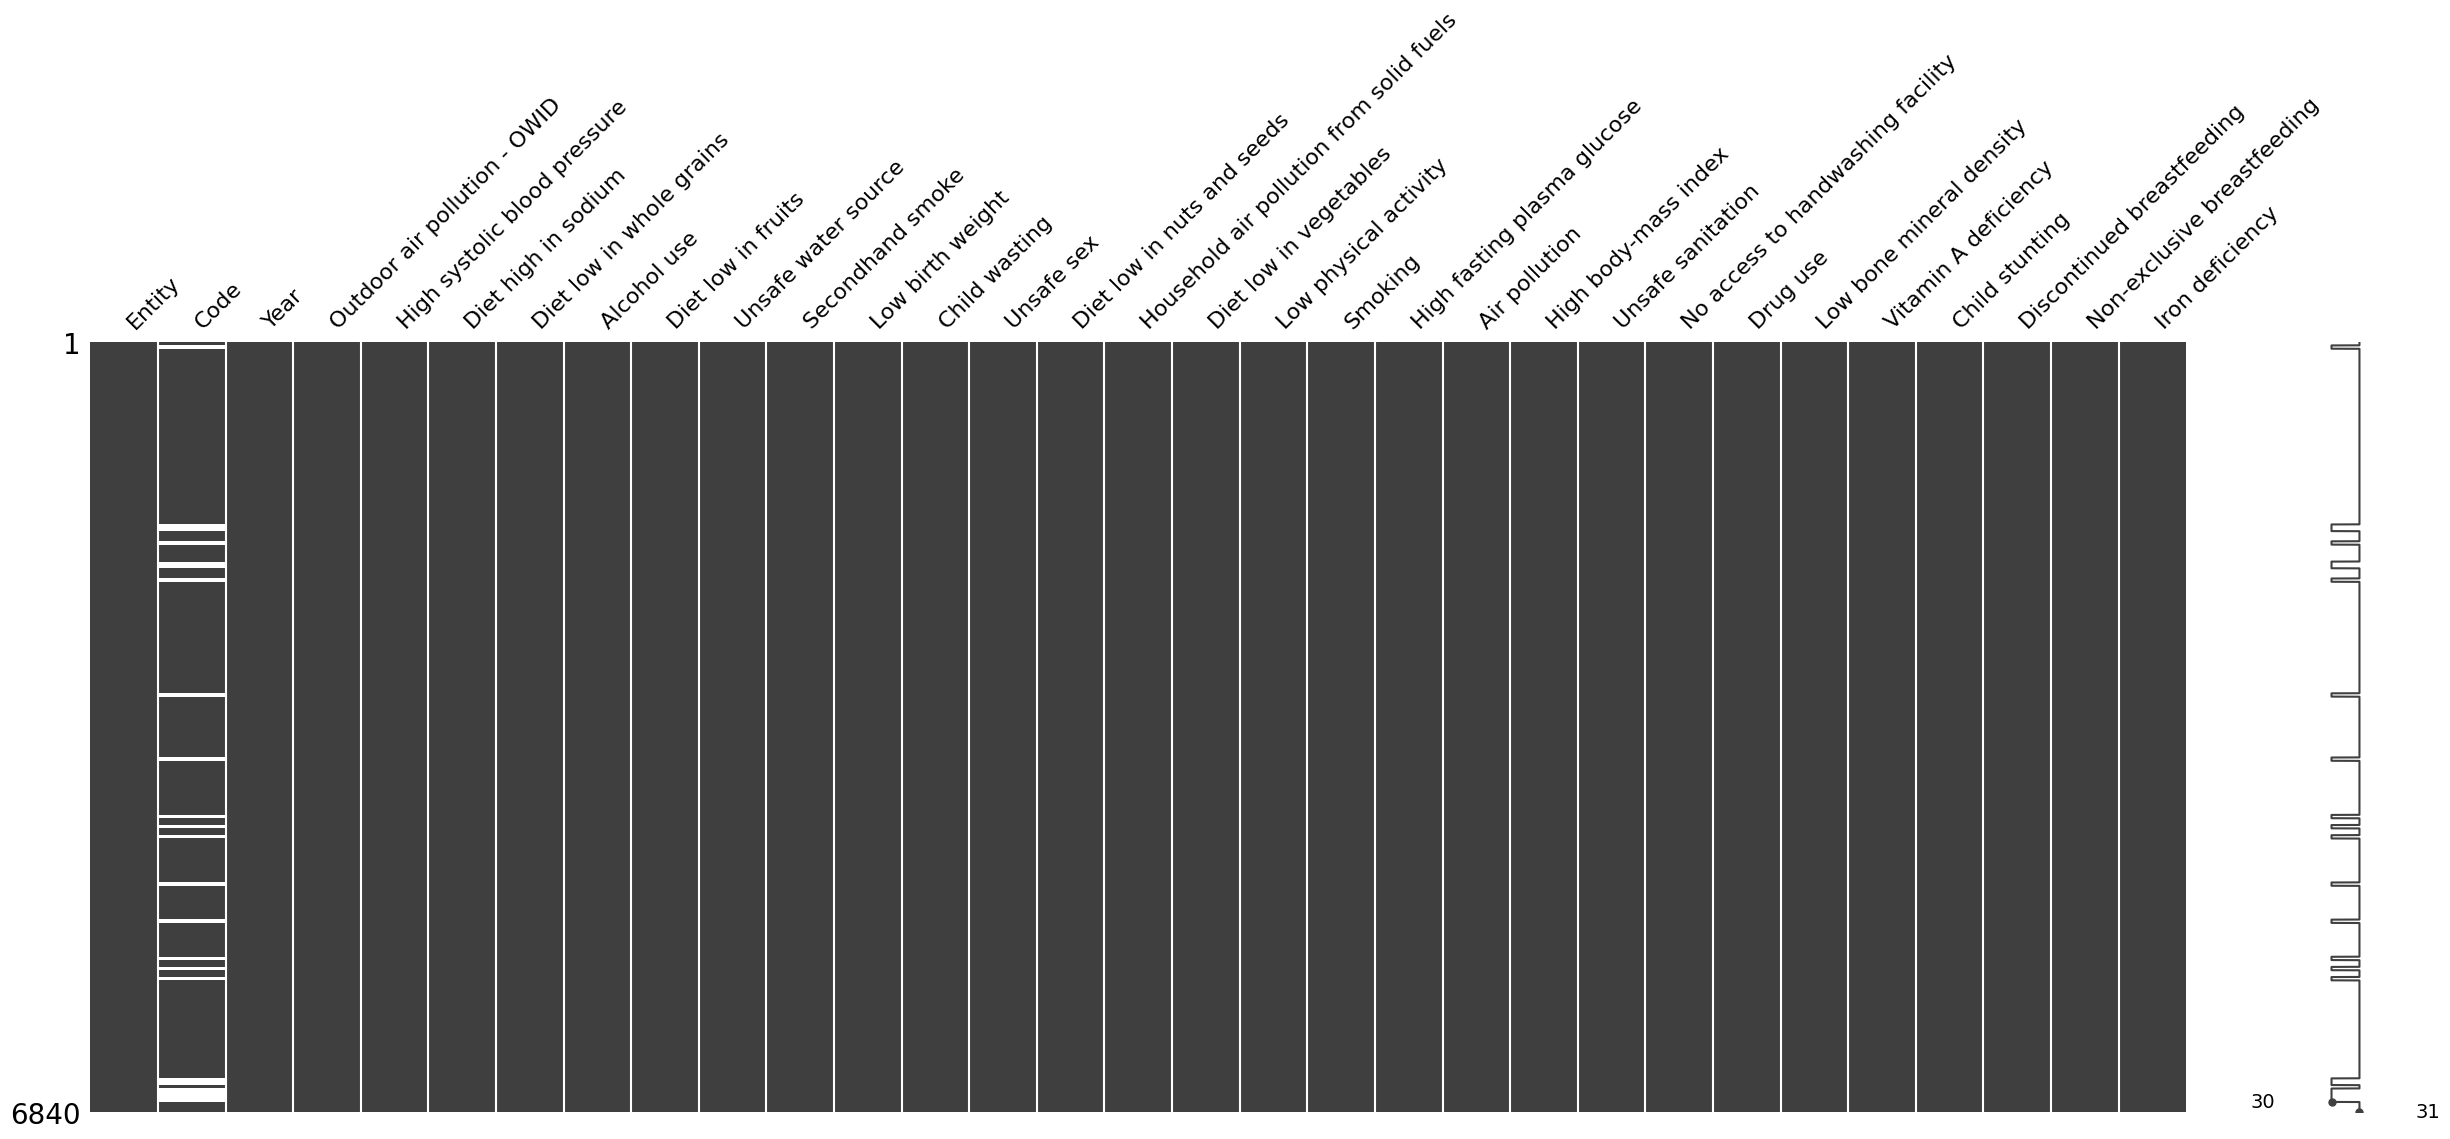

In [9]:
# Plot graphic of missing values
missingno.matrix(death_df, figsize = (30,10));

From the plot above we can see that it confirms only one column has missing values or datapoints. This columns contains information about the country code for each of the recorded countries. Below I will be looking at the total number of missing data and what percentage it makes up.

In [10]:
# getting the number of missing data points per column
missing_datapoints = death_df.isnull().sum()

# number of missing data points in the columns
missing_datapoints[missing_datapoints != 0]

Code    690
dtype: int64

In [11]:
# getting the total number of cells 
total = np.product(death_df.shape)

# gettng total number of missing data points
missing_data_total = missing_datapoints.sum()

# checking the percentage of missing data
percent = f"{round((missing_data_total/total)*100,2)}%"

print("Percentage of missing datapoints is",percent)

Percentage of missing datapoints is 0.33%


The missing datapoints make up a very small amount of the missing data and the data in the column overall makes up only 3.1% of the total dataset. For this column imputation is not necessary as we do not need this column since we have the names of the countries. There instead I will be dropping this column since deleting the null datapoints rows will result in information loss.

In [12]:
# dropping the Code column
death_df.drop('Code',axis=1, inplace=True)

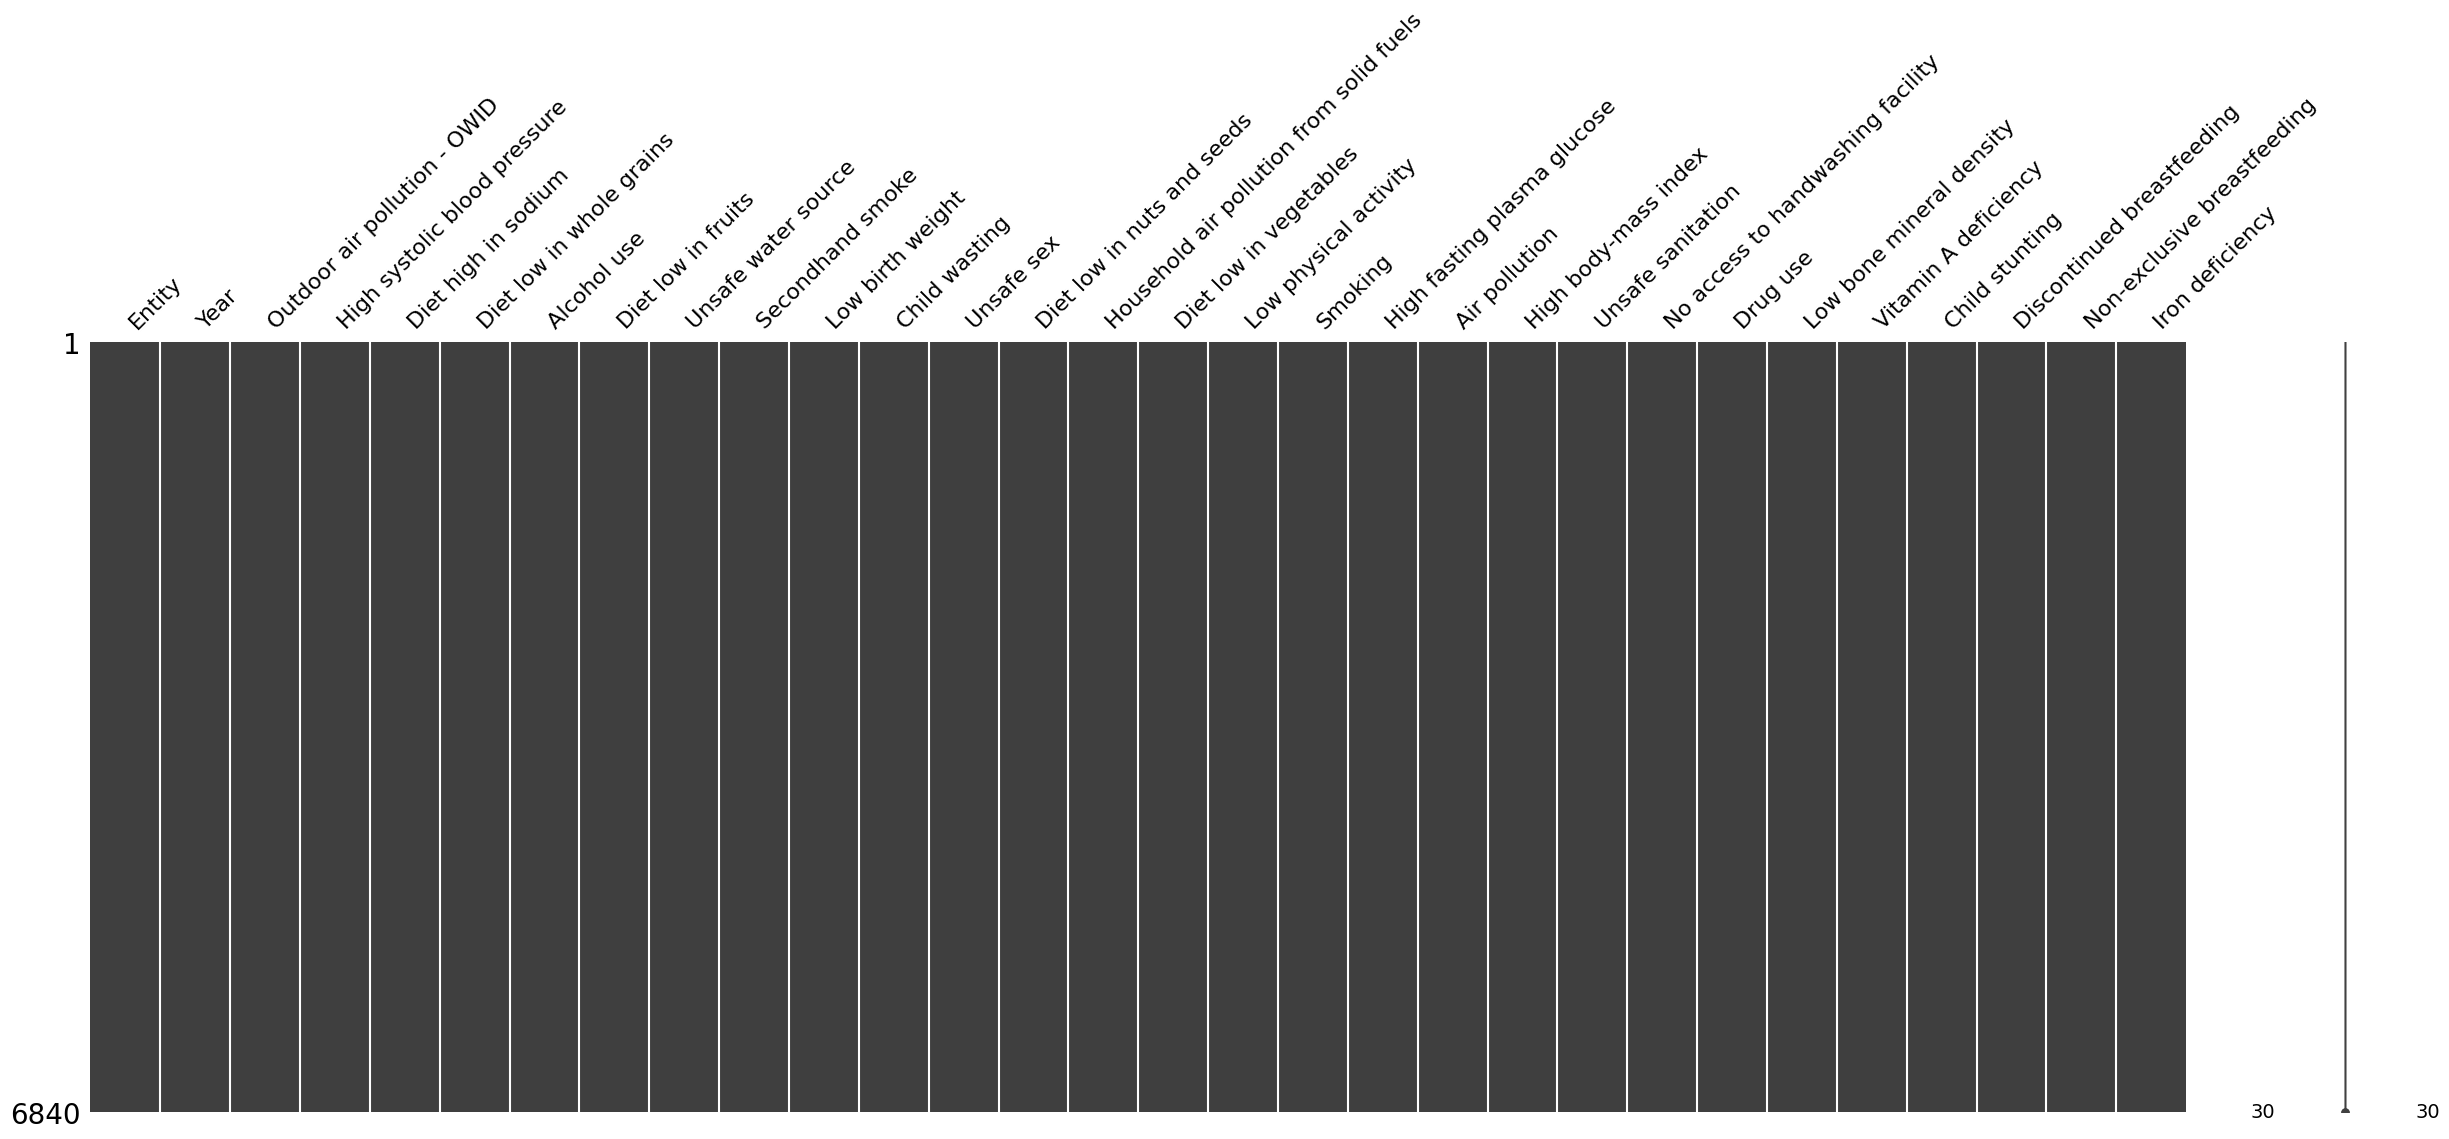

In [13]:
# Plot graphic of missing values
missingno.matrix(death_df, figsize = (30,10));

Now that the missing datapoints have been handled, we can move on to the next step which is the exploratory data analysis. From this we can hope to get some insights about this dataset.

# Data Exploration

The first step is to see which of these risk factors has contributed the most to deaths in the years from 1990 to 2019. The bar plot below indicates that the top 3 factors that contribute to most deaths are high systolic blood pressure, smoking and air pollution. Of course it is no suprise to see high body-mass index in the top 5 as obesity is known for contributing in the development of many chronic diseases and cancers.

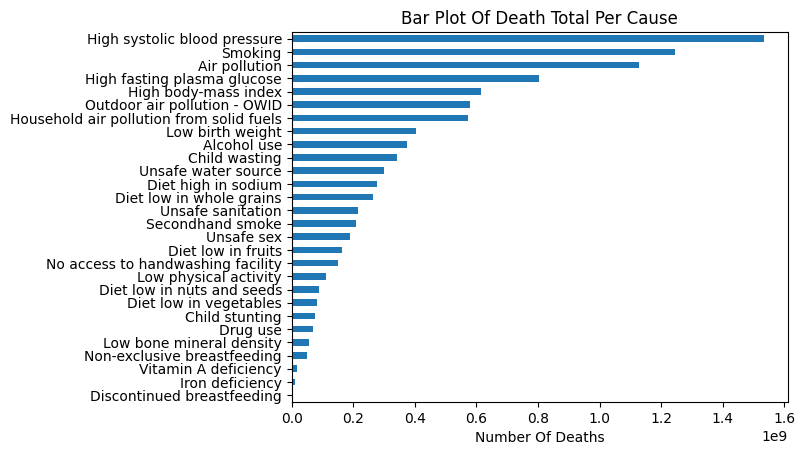

In [14]:
# calculating total deaths per risk factor
death_total_per_cause = death_df.iloc[:,2:].sum().sort_values()

# bar plot of total deaths per risk factor
death_total_per_cause.plot.barh()

# labelling the bar plot
plt.title('Bar Plot Of Death Total Per Cause')
plt.xlabel('Number Of Deaths')

plt.show() # showing bar plot

It can be seen that people die the least from  iron or vitamin A deficiency, and that the least cause of death in the world is the discontinuation of breasfeeding. 

Below is a line plot of the number of deaths over the years and it can be seen that the numbers increase in each year and the prediction is that the trend will continue in this upward trajectory. But ofcourse this could be expected as the population of the world is increasing due to better living conditions and industralisation, of course with this also comes many diseases and unhealthy lifestyles. 

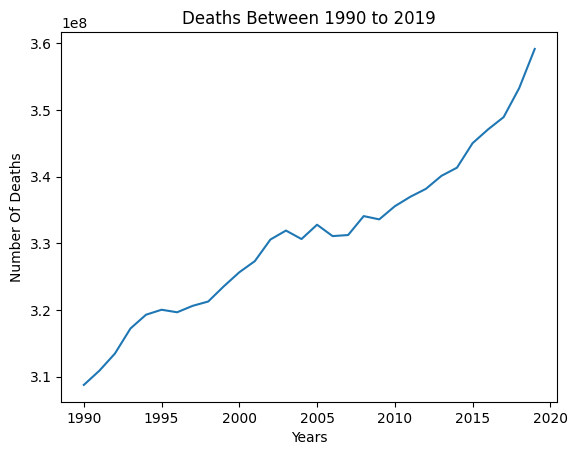

In [15]:
# new columns of row totals
death_df['Totals']= death_df.iloc[:,2:].sum(axis = 1)

years = death_df.Year.unique()

# Total deaths per year
total_per_year = death_df.groupby('Year')['Totals'].sum()

# line plot of deaths over the years
sns.lineplot(x = years, y = total_per_year)

# labelling the line plot
plt.title('Deaths Between 1990 to 2019')
plt.ylabel('Number Of Deaths')
plt.xlabel('Years')

plt.show() # showing line plot

Below is a bar plot showing the top ten entities that have the highest deaths in the 29 year period, the data contains numbers for individual countries, regions and the whole world. It can be seen that in this period 1.7 billion people died in the whole world due to these risk factors. Note that china appears in the top ten even though it is a country and not a region made up of multiple contries, this could be due to it having a large population. 

In [16]:
# total deaths per entity
total_per_entity = death_df.groupby('Entity')['Totals'].sum()

# top 10 of entities with most deaths
total_per_entity = total_per_entity.sort_values(ascending = False)[:10]

# bar plot of top 10 
fig = px.bar(total_per_entity,text_auto = '.2s')

# bar plot layout
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title='Deaths per Entity',
    title_x=0.5)


fig.show() # showing bar plot

And below is a bar plot representation of the countries with the lowest number of deaths in the 29 year period, this is to be expected since these are islands which have very small populations. For instance Tokelau has only 350 deaths and its population as of today is only 1411 people.

In [17]:
# total deaths per entity
total_per_entity = death_df.groupby('Entity')['Totals'].sum()

# top 10 entities with lowest deaths
total_per_entity = total_per_entity.sort_values(ascending = True)[:10]

# bar plot of top 10
fig = px.bar(total_per_entity, text_auto = '.2s')

# bar plot layout
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title='Deaths per Entity',
    title_x=0.5)

fig.show() # showing plot

Now having analysed the data and gained some insights, I will try to gain insights on the following risk factors.

- What is the relationship between the top 5 risk factors?
- Deaths due to air pollution over the years?
- Correlation between unsafe sex, alcohol use and drug use deaths.
- Deaths due to unsafe sex over the years.
- correlation between high body-max index and High systolic blood pressure.
- Deaths due to unsafe sanitation
- Deaths due to unsafe water source

But first I will remove the rows that contain data for the whole world, regions and any grouped entities data. The focus of the analysis will be on data based on individual countries.

In [18]:
# list of entities to removes
combined_entities = [
    
    'African Region (WHO)','East Asia & Pacific (WB)','Eastern Mediterranean Region (WHO)',
    'Europe & Central Asia (WB)','European Region (WHO)','Latin America & Caribbean (WB)',
    'Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)',
    'South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','United States Virgin Islands',
    'Western Pacific Region (WHO)', 'World','World Bank High Income', 'World Bank Low Income',
    'World Bank Lower Middle Income', 'World Bank Upper Middle Income'
]

# iterating through list of entities to remove
for entity in combined_entities:
    
    # removing entity from dataframe
    death_df = death_df[death_df.Entity != entity]

death_df.shape

(6240, 31)

## What is the relationship between the top 5 risk factors?

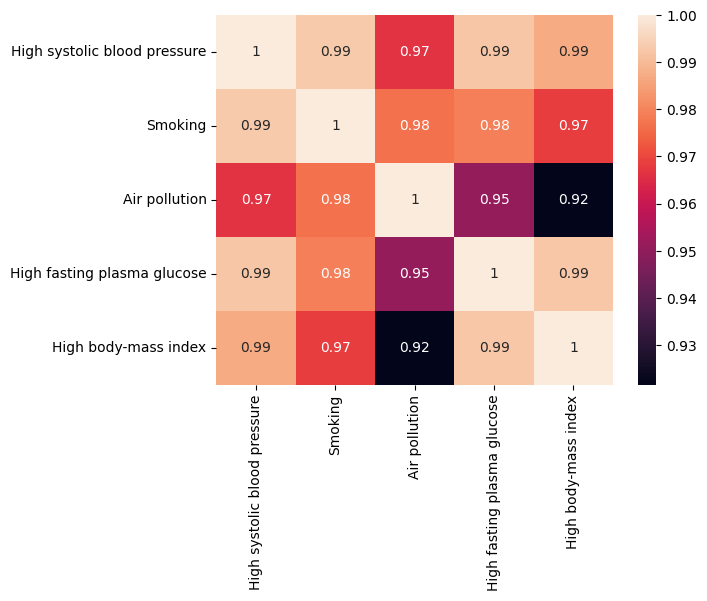

In [19]:
# list of risk factors
factors = [
    
    'High systolic blood pressure','Smoking','Air pollution',
    'High fasting plasma glucose','High body-mass index'
]

risks = death_df[factors]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = risks.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

There is a strong positive correlation between all the deaths due to these risk factors. This indicates that most people are likely to die due to one or multiple factors at the same time deteriorating their state of health . This also indicates that some of these factors may develop due to other factors put-ting one at a very high risk of dying.


## Deaths due to unsafe sex over the years.

In [20]:
# unsafe sex death totals per year
unsafe_sex = death_df.groupby('Year')['Unsafe sex'].sum()

# line plot of unsafe sex totals
fig = px.line(unsafe_sex)

# plot layout
fig.update_layout(title='Unsafe sex deaths',title_x=0.5)

# showing plot
fig.show()

In this period the number of deaths due to unsafe sex have been on a steady incline from 1990 and reaching a peak in 2005 with deaths of at least 2.2 million in that year, where a steady decline seems to have occurred since. This could be due to better education about sex and lessened stigma against STD's,STI's and HIV/AIDS. Also treatment and prevention for these has been improving over the years, so it is expected that the numbers would drop.

## correlation between unsafe sex, alcohol use and drug use deaths.

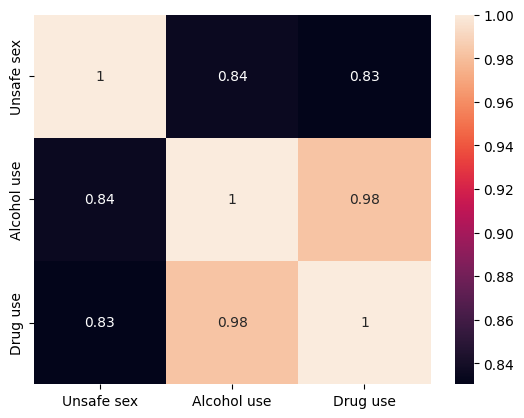

In [21]:
# list of risk factors
factors = [
    'Unsafe sex','Alcohol use','Drug use',
]


risks = death_df[factors]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = risks.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

The correlation indicates that there is a strong chance that if you use alcohol you might engage in unsafe sex and thus lead to your death resulting from  unsafe sex and the same is true when engag-ing in drug use. 

The correlation also indicates that there is a very strong chance that if you engage in alcohol use, you will also engage in drug use and thus these will lead to your death simultaneously.


## Deaths due to air pollution over the years?

In [22]:
# air pollution death totals per year
air_pollution = death_df.groupby('Year')['Air pollution'].sum()

# line plot of air pollution deaths
fig = px.line(air_pollution)

# plot layout
fig.update_layout(title='Air pollution deaths',title_x=0.5)

fig.show() # showing plot

Air pollution death has been fluctuating over the years and this could be due to the awareness of climate change and environmental activism reducing air pollution from time to time. But the plot above shows that after a certain period air pollution rises and then drops and the cycle repeats. This could be due to changes in sovereign and international politics from time to time. 

## correlation between high body-max index and High systolic blood pressure

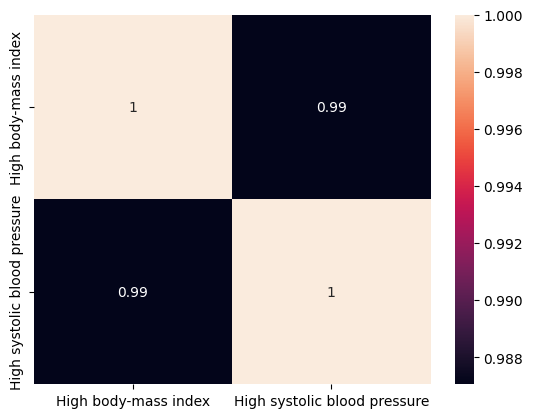

In [23]:
# list of risk factors
factors = [
    'High body-mass index','High systolic blood pressure',
]

risks = death_df[factors]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = risks.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

The correlation between these variables is not surprising as it is known that High body-mass index leads to insulin resistance which contributes to the development of chronic diseases. So with a high body-mass index, there is high likelyhood of high systolic blood pressure and therefore the relationship between deaths due to these factors is highly likely.

## Deaths due to unsafe sanitation 

In [24]:
# Unsafe sanitation death totals per year
sanitation = death_df.groupby('Year')['Unsafe sanitation'].sum()

year = death_df.Year.unique()

# instantiating the figure object
line_graph = figure(x_axis_label = 'Year', y_axis_label = 'Number of deaths',
                    title = "Unsafe sanitation death", height = 350)
  
# plotting the line graph
line_graph.line(x = year, y = sanitation)
   
# displaying the model
show(line_graph)

The figure above shows that over the years death due to unsafe sanitation has been on a steady decline. This means over the years the majority of the human population has gained access to adequate facilities for human waste disposal and maintenance of hygienic conditions.

## Deaths due to unsafe water source

The number of people dying from the lack of safe water sources has been reduced significantly over the years. This means the majority of the population global has access to clean water that is not contaminated by chemicals/pollution, parasites, germs etc.

In [25]:
# Unsafe water source death totals per year
water_source = death_df.groupby('Year')['Unsafe water source'].sum()

year = death_df.Year.unique()

# instantiating the figure object
line_graph = figure(x_axis_label = 'Year', y_axis_label = 'Number of deaths',
                    title = "Unsafe water source death", height = 350)
  
# plotting the line graph
line_graph.line(x = year, y = water_source)
   
# displaying the model
show(line_graph)